Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
#import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50);


Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

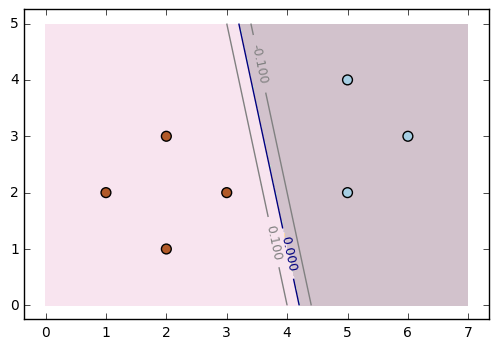

In [4]:
# Vaš kôd ovdje...   
def plot_decision_boundary(x_min, x_max, y_min, y_max, h, boundary=0, margins=None):
    x = linspace(x_min, x_max)
    y = linspace(y_min, y_max)
    X1, X2 = np.meshgrid(x, y)
    #XX = sp.dstack((sp.ones((50, 50)), X1, X2))
    XX = sp.dstack((X1, X2))
    tmp = plt.contour(X1, X2, h(XX), linecolor='red', levels=[boundary])
    plt.clabel(tmp, fontsize=9, inline=1)
    if margins!=None:
        CS = plt.contour(X1, X2, h(XX), colors=['gray', 'gray'], levels=[margins[0],margins[1]])
        plt.clabel(CS, fontsize=9, inline=1)

def h(x, w, w0): 
    return sp.dot(x, w) + w0
        
rc = RidgeClassifier(alpha=0.0)
rc.fit(seven_X, seven_y)

w = rc.coef_[0]
w0 = rc.intercept_

plot_2d_clf_problem(seven_X, seven_y, lambda x : rc.predict(x) >= 0)
plot_decision_boundary(0, 7, 0, 5, lambda x : h(x, w, w0), margins=(-0.1, 0.1))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

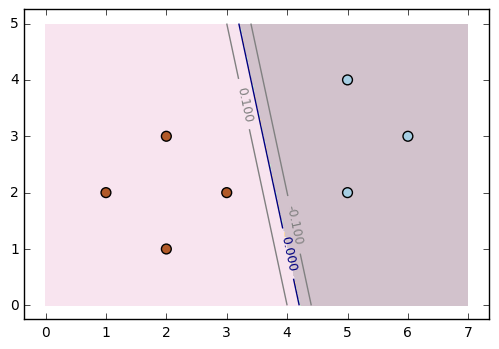

In [5]:
# Vaš kôd ovdje...
model = LinearRegression()
model.fit(seven_X, seven_y)

w = model.coef_
w0 = model.intercept_

plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0)
plot_decision_boundary(0, 7, 0, 5, lambda x : h(x, w, w0), margins=(-0.1, 0.1))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

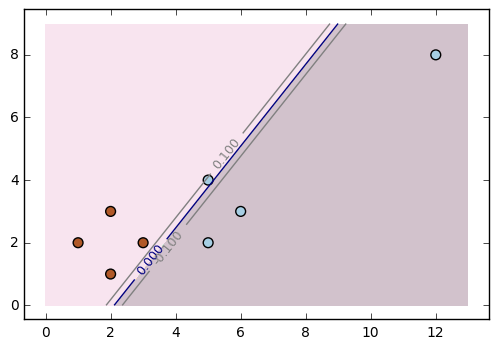

In [7]:
# Vaš kôd ovdje...
rc = RidgeClassifier(alpha=0.0)
rc.fit(outlier_X, outlier_y)

w = rc.coef_[0]
w0 = rc.intercept_

plot_2d_clf_problem(outlier_X, outlier_y, lambda x : rc.predict(x) >= 0)
plot_decision_boundary(0, 13, 0, 9, lambda x : h(x, w, w0), margins=(-0.1, 0.1))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

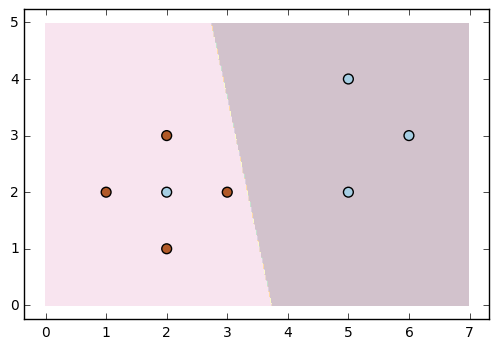

In [9]:
# Vaš kôd ovdje...
rc = RidgeClassifier(alpha=0.0)
rc.fit(unsep_X, unsep_y)

w = rc.coef_[0]
w0 = rc.intercept_

plot_2d_clf_problem(unsep_X, unsep_y, lambda x : rc.predict(x) >= 0)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

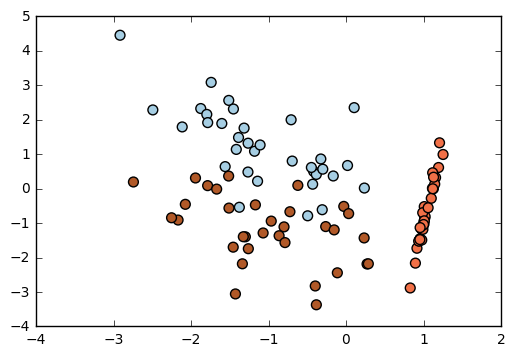

In [11]:
# Vaš kôd ovdje...
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

1.03207306407
-0.351220826575
0.319147762505
0
0


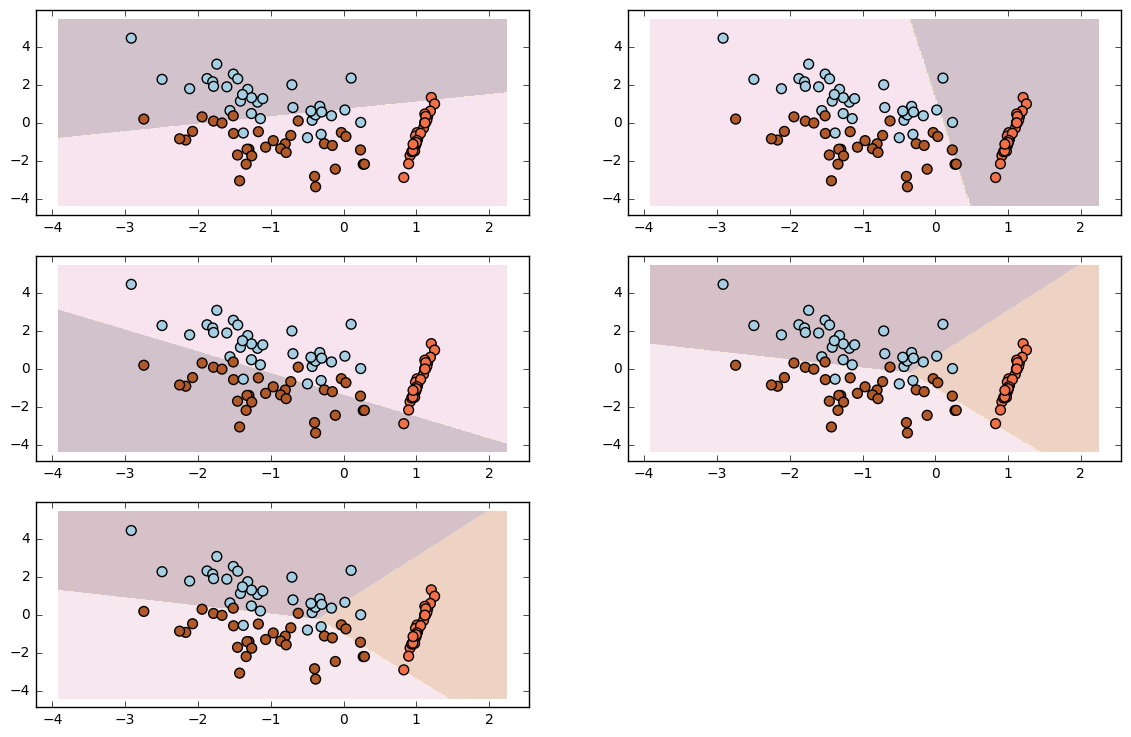

In [12]:
# Vaš kôd ovdje...
h1 = LinearRegression()
h2 = LinearRegression()
h3 = LinearRegression()

def h_max(X, hs):
    ys = []
    for h_i in hs:
        ys.append(h_i.predict(X))
    
    ys = np.array(ys)
    
    results = []
    for i in range(len(ys[0])):
        values = ys[:, i]
        max_value = values[0]
        max_j = 0
        for j in range(1, len(values)):
            if values[j] > max_value:
                max_value = values[j]
                max_j = j
        
        results.append(max_j)
        
    return np.array(results)
            
h1.fit(X, map(lambda x: 1.0 if x == 0 else 0.0, y))
h2.fit(X, map(lambda x: 1.0 if x == 1 else 0.0, y))
h3.fit(X, map(lambda x: 1.0 if x == 2 else 0.0, y))

plt.figure(figsize=(14,9))
plt.subplot(321)
plot_2d_clf_problem(X, y, lambda x : h1.predict(x) <= 0.5)
plt.subplot(322)
plot_2d_clf_problem(X, y, lambda x : h2.predict(x) <= 0.5)
plt.subplot(323)
plot_2d_clf_problem(X, y, lambda x : h3.predict(x) <= 0.5)

plt.subplot(324)
hs = [h1, h2, h3]

plot_2d_clf_problem(X, y, lambda x : h_max(x, hs))

h_rc = RidgeClassifier(alpha=0.0)
h_rc.fit(X, y)

print h1.predict(X)[0]
print h2.predict(X)[0]
print h3.predict(X)[0]
print h_max(X, hs)[0]
print h_rc.predict(X)[0]

plt.subplot(325)
plot_2d_clf_problem(X, y, lambda x : h_rc.predict(x))

plt.show()




### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [13]:
def sigm(x):
    # Vaš kôd ovdje...
    return 1.0/(1.0+sp.exp(-x))

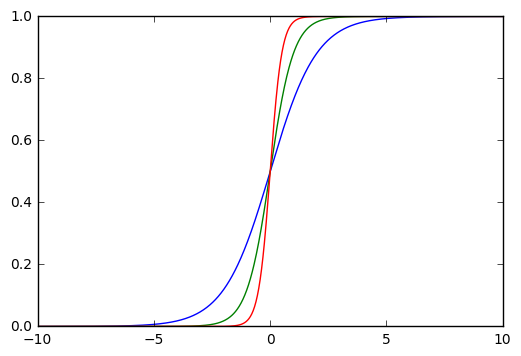

In [14]:
# Vaš kôd ovdje...
xs = linspace(-10, 10, 1000)
ys1 = sigm(xs)
ys2 = sigm(2*xs)
ys3 = sigm(4*xs)

plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.plot(xs, ys3);

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [15]:
# Vaš kôd ovdje...
from sklearn.preprocessing import PolynomialFeatures

def error(phi, y, w):
    loss_sum = 0.0
    
    for x, y_i in zip(phi, y):
        h = sigm(np.dot(x, w))
        loss_sum += ((-y_i)*np.log(h) - (1 - y_i)*np.log(1 - h))
        
    #print loss_sum
    return (1.0/len(phi))*loss_sum

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    poly = PolynomialFeatures(1)
    phi = poly.fit_transform(X)
    
    if trace:
        w_trace = []
    
    w = np.zeros(len(X[0]))
    w0 = 0
    
    if trace:
        w_trace.append(np.hstack((w0, w)))
    
    last_iter_error = None
    for i in xrange(max_iter):
        delta_w0 = 0.0
        delta_w = np.zeros(len(w))
        
        for x, y_i in zip(phi, y):
            h = sigm(np.dot(x, np.hstack((w0, w))))
            delta_w = delta_w + (h - y_i)*x[1:]
            delta_w0 = delta_w0 + (h - y_i)
        
        w0 = w0 - eta*delta_w0
        w = w*(1 - eta*alpha) - eta*delta_w
        
        if trace:
            w_trace.append(np.hstack((w0, w)))
        
        err = error(phi, y, np.hstack((w0, w)))
        if (last_iter_error is not None) and np.absolute(last_iter_error-err) < epsilon:
            break
            
        last_iter_error = err        

    if trace:
        return np.hstack((w0,w)), w_trace
    else:
        return np.hstack((w0,w))

def lr_h(x, w):
    return sigm(np.dot(x, w[1:]) + w[0])
    
    
def lr_h_2(x, w):
    return sigm(sp.dot(x, w[1:])+w[0])
    


#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [16]:
# Vaš kôd ovdje...
from sklearn.metrics import log_loss
def cross_entropy_error(X, y, w):
    summed_losses = log_loss(y, lr_h(X, w))
        
    return summed_losses

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

[[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]]
[0, 0, 0, 0, 1, 1, 1]
[-4.45449454  1.71089242 -0.68413507]
Error: 0.135218727202


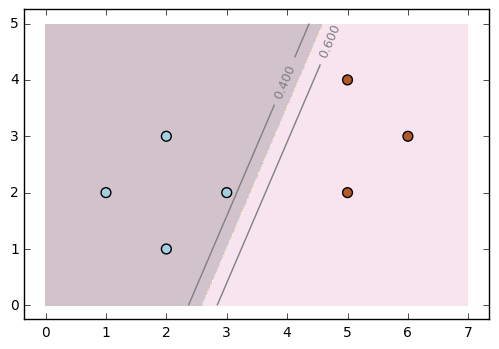

In [17]:
# Vaš kôd ovdje...
seven_y_2 =[0 if y == 1 else 1 for y in seven_y]
w, trace = lr_train(seven_X, seven_y_2, trace=True)

plot_2d_clf_problem(seven_X, seven_y_2, lambda x : lr_h(x, w) >= 0.5)
plot_decision_boundary(0, 7, 0, 5, lambda x : lr_h_2(x, w), margins=(0.4, 0.6))

print seven_X
print seven_y_2

print w
print "Error: " + str(cross_entropy_error(seven_X, seven_y_2, w))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [18]:
from sklearn.metrics import zero_one_loss

948


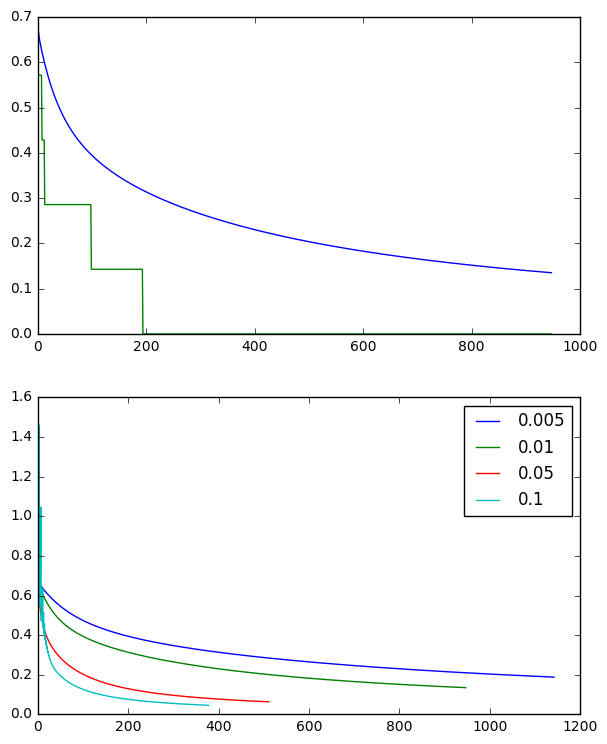

In [19]:
# Vaš kôd ovdje...
def zero_one_loss_error(X, y, w):
    hs = [0 if h < 0.5 else 1 for h in lr_h(X, w)]
    return zero_one_loss(y, hs)

w, trace = lr_train(seven_X, seven_y_2, trace=True)

print len(trace)
logistic_errors = [cross_entropy_error(seven_X, seven_y_2, w) for w in trace]
zero_one_loss_errors = [zero_one_loss_error(seven_X, seven_y_2, w) for w in trace]
xs = xrange(0, len(trace))

plt.figure(figsize=(7,9))
plt.subplot(211)
plt.plot(xs, logistic_errors)
plt.plot(xs, zero_one_loss_errors)

plt.subplot(212)
for eta_i in [0.005, 0.01, 0.05, 0.1]:
    w, trace = lr_train(seven_X, seven_y_2, trace=True, eta=eta_i)
    logistic_errors = [cross_entropy_error(seven_X, seven_y_2, w_i) for w_i in trace]
    xs = xrange(0, len(trace))
    plt.plot(xs, logistic_errors, label=str(eta_i))
plt.legend();


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?


#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

My error: 0.135218727202
LogisticRegression error: 0.0088909731461


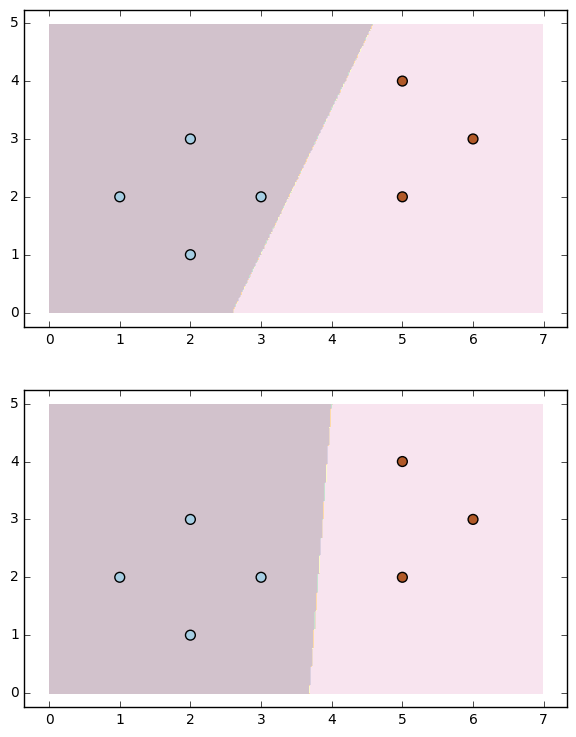

In [20]:
# Vaš kôd ovdje...
from sklearn.linear_model import LogisticRegression

w, trace = lr_train(seven_X, seven_y_2, trace=True)

log_reg = LogisticRegression(C=1E3)
log_reg.fit(seven_X, seven_y_2)

their_w = np.hstack((log_reg.intercept_, log_reg.coef_[0]))

print "My error: " + str(cross_entropy_error(seven_X, seven_y_2, w))
print "LogisticRegression error: " + str(cross_entropy_error(seven_X, seven_y_2, their_w))

plt.figure(figsize=(7,9))
plt.subplot(211)
plot_2d_clf_problem(seven_X, seven_y_2, lambda x : lr_h(x, w) >= 0.5)
plt.subplot(212)
plot_2d_clf_problem(seven_X, seven_y_2, lambda x : lr_h(x, their_w) >= 0.5)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

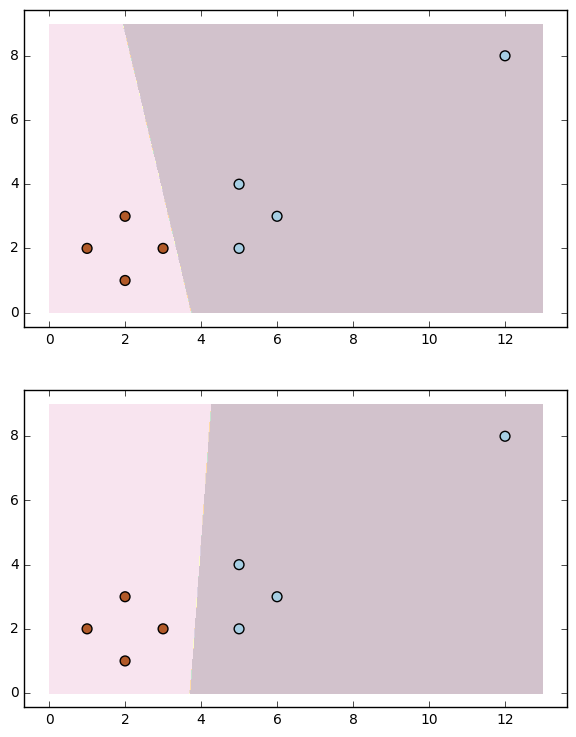

In [21]:
# Vaš kôd ovdje...
log_reg = LogisticRegression(C=1E3)
log_reg.fit(outlier_X, outlier_y)

plt.figure(figsize=(7,9))

plt.subplot(211)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x : rc.predict(x) >= 0)

plt.subplot(212)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x : log_reg.predict(x) >= 0)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


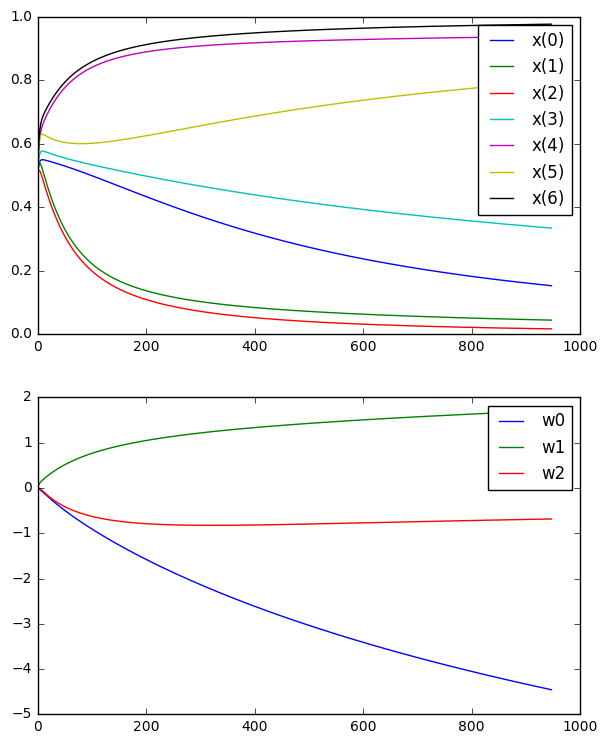

In [22]:
# Vaš kôd ovdje...
w, trace = lr_train(seven_X, seven_y_2, trace=True)

xs = xrange(len(trace))

outputs = []
for x in seven_X:
    output = []
    for w_i in trace:
        output.append(lr_h(x, w_i))
    outputs.append(output)

outputs = np.array(outputs)

plt.figure(figsize=(7,9))

plt.subplot(211)
for i, output in enumerate(outputs):
    plt.plot(xs, output, label='x(' + str(i) + ')')
plt.legend()

plt.subplot(212)
w0, w1, w2 = zip(*trace)
plt.plot(xs, w0, label='w0')
plt.plot(xs, w1, label='w1')
plt.plot(xs, w2, label='w2')
plt.legend()


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

[0, 0, 0, 0, 1, 1, 1, 1]


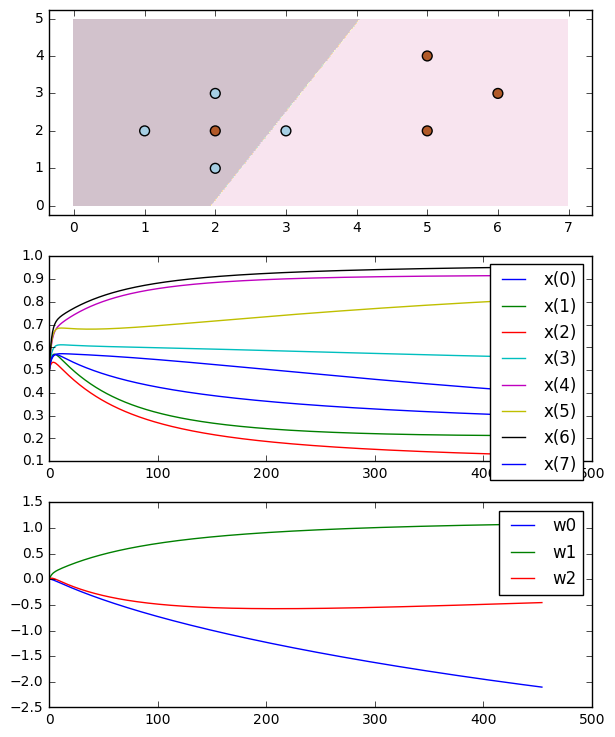

In [23]:
# Vaš kôd ovdje...

unsep_y_2 = [0 if y_i == 1 else 1 for y_i in unsep_y]
w, trace = lr_train(unsep_X, unsep_y_2, trace=True)

print unsep_y_2
xs = xrange(len(trace))

outputs = []
for x in unsep_X:
    output = []
    for w_i in trace:
        output.append(lr_h(x, w_i))
    outputs.append(output)

outputs = np.array(outputs)

plt.figure(figsize=(7,9))

plt.subplot(311)
plot_2d_clf_problem(unsep_X, unsep_y_2, lambda x : lr_h(x, w) >= 0.5)

plt.subplot(312)
for i, output in enumerate(outputs):
    plt.plot(xs, output, label='x(' + str(i) + ')')
plt.legend()

plt.subplot(313)
w0, w1, w2 = zip(*trace)
plt.plot(xs, w0, label='w0')
plt.plot(xs, w1, label='w1')
plt.plot(xs, w2, label='w2')
plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

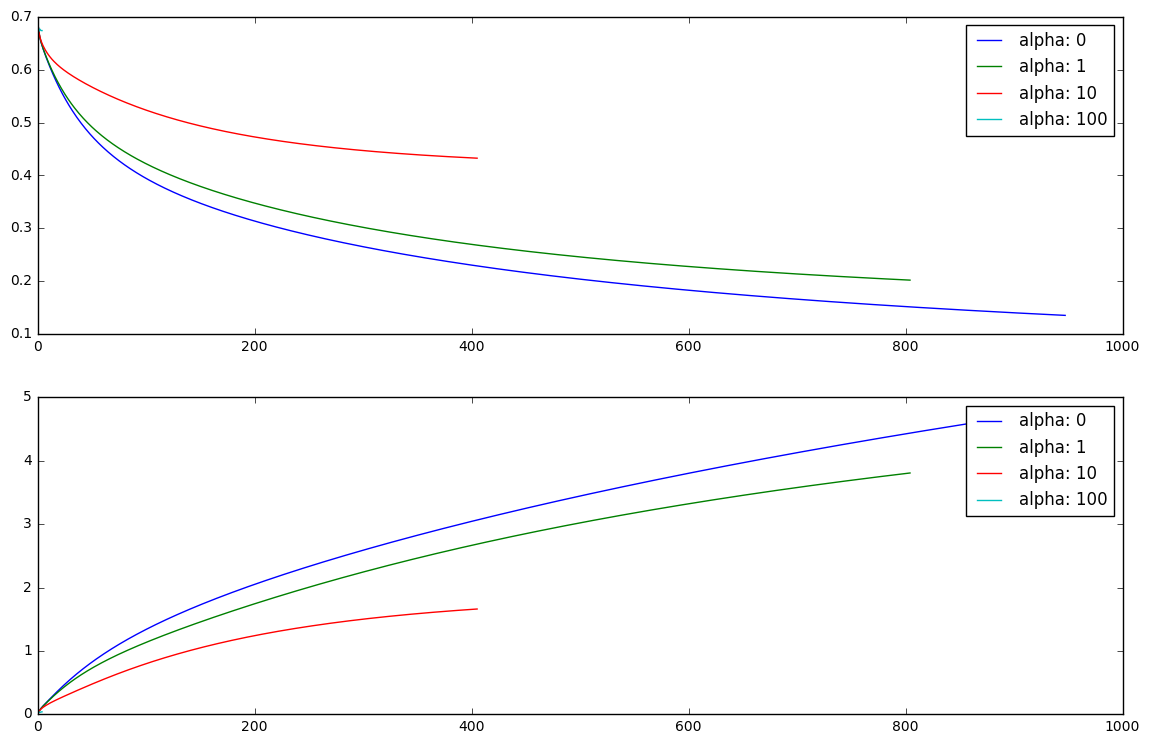

In [24]:
# Vaš kôd ovdje...w, trace = lr_train(seven_X, seven_y_2, trace=True)
from numpy import linalg

alphas = [0, 1, 10, 100]

plt.figure(figsize=(14,9))
plt.subplot(211)

for alpha_i in alphas:
    w, trace = lr_train(seven_X, seven_y_2, trace=True, alpha=alpha_i)
    logistic_errors = [cross_entropy_error(seven_X, seven_y_2, w) for w in trace]
    xs = xrange(0, len(trace))

    plt.plot(xs, logistic_errors, label='alpha: ' + str(alpha_i))

plt.legend();

plt.subplot(212)
for alpha_i in alphas:
    w, trace = lr_train(seven_X, seven_y_2, trace=True, alpha=alpha_i)
    xs = xrange(len(trace))
    plt.plot(xs, [linalg.norm(w_i) for w_i in trace], label='alpha: ' + str(alpha_i))

plt.legend();    
    

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?


### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

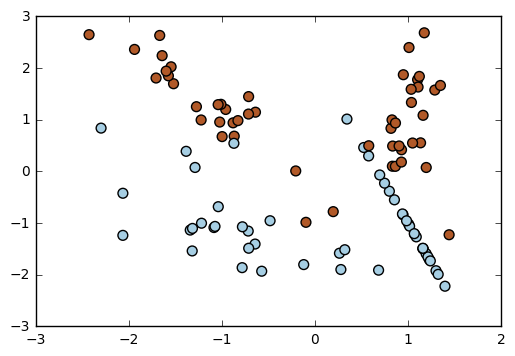

In [25]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=100, n_features=2, n_clusters_per_class=2, n_redundant=0)
plot_2d_clf_problem(X, y)

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

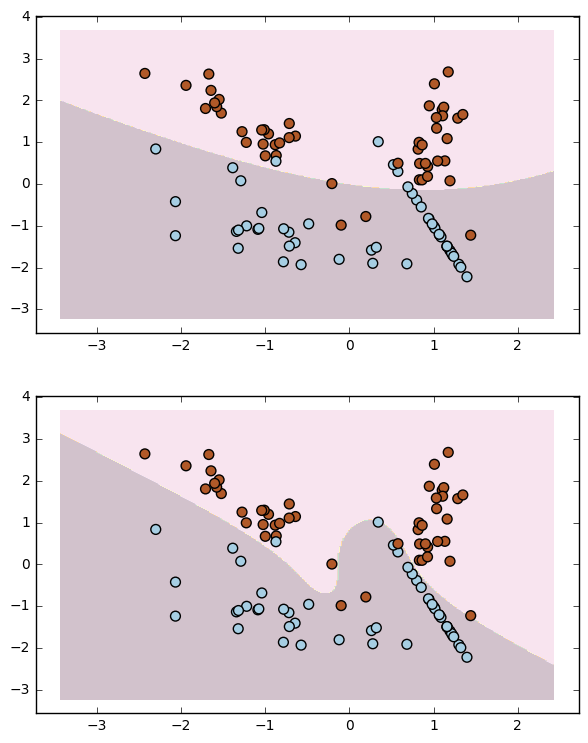

In [26]:
# Vaš kôd ovdje...
poly2 = PolynomialFeatures(2)
poly2.fit(X)
poly3 = PolynomialFeatures(3)
poly3.fit(X)

lr2 = LogisticRegression(C=10)
lr2.fit(poly2.transform(X), y)

lr3 = LogisticRegression(C=10)
lr3.fit(poly3.transform(X), y)

plt.figure(figsize=(7,9))

plt.subplot(211)
plot_2d_clf_problem(X, y, lambda x : lr2.predict(poly2.transform(x)))

plt.subplot(212)
plot_2d_clf_problem(X, y, lambda x : lr3.predict(poly3.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

[ 0.          1.1513192   5.42762481]
1.15131919974
5.4276248103
[  1.00000000e+01   9.99200722e-16   7.89473738e+00]
9.99200722163e-16
7.89473738118


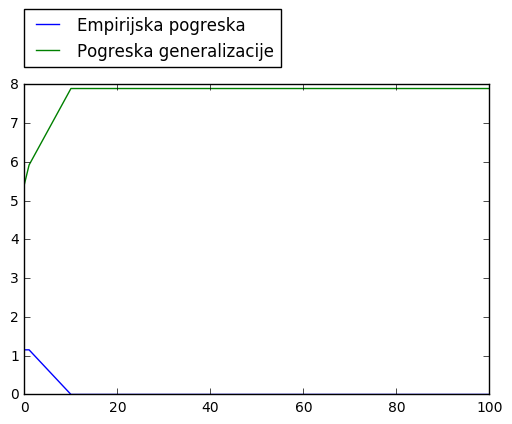

In [27]:
# Vaš kôd ovdje...
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

poly = PolynomialFeatures(4)

alphass = np.array(xrange(-8, 9))
triplets = []

for alpha in alphas:
    log_reg = LogisticRegression(C=float(pow(2, alpha)))
    log_reg.fit(poly.fit_transform(X_train), y_train)
    
    train_pred = log_reg.predict(poly.transform(X_train))
    test_pred = log_reg.predict(poly.transform(X_test))
    
    train_error = log_loss(y_train, train_pred)
    test_error = log_loss(y_test, test_pred)
    
    triplets.append([alpha, train_error, test_error])
    
triplets = np.array(triplets)
print triplets[0]
print triplets[:,1][0]
print triplets[:,2][0]

print triplets[2]
print triplets[:,1][2]
print triplets[:,2][2]

plt.plot(triplets[:,0], triplets[:,1], label="Empirijska pogreska")
plt.plot(triplets[:,0], triplets[:,2], label="Pogreska generalizacije")
plt.legend(bbox_to_anchor=(0.57, 1.27));

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?